In [1]:
#import 
import numpy as np
import pandas as pd
import hyperopt
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as sklm

In [2]:
train= pd.read_csv('train_values.csv')
test= pd.read_csv('test_values.csv')
train_label =pd.read_csv('train_labels.csv')

In [3]:
join_train = pd.merge(train, train_label, on='row_id')
join_train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [4]:
join_train.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

In [5]:
join_train.fillna(-999,inplace=True)
test.fillna(-999,inplace=True)

In [6]:
x = join_train.drop('accepted',axis=1)
y = join_train.accepted

In [7]:
x.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
dtype: object

In [8]:
print(x.shape)
print(y.shape)

(500000, 22)
(500000,)


In [9]:
cate_features_index = np.where(x.dtypes != float)[0];cate_features_index

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 20, 21],
      dtype=int64)

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)

# 7. Catboost algorithm

In [11]:
model = CatBoostClassifier(iterations=3000, depth=8, learning_rate=0.01,eval_metric='Accuracy',use_best_model=True, random_seed=42)
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

0:	learn: 0.7005341	test: 0.7028933	best: 0.7028933 (0)	total: 6.59s	remaining: 5h 29m 35s
1:	learn: 0.7023976	test: 0.7037600	best: 0.7037600 (1)	total: 12.4s	remaining: 5h 8m 39s
2:	learn: 0.7033435	test: 0.7055733	best: 0.7055733 (2)	total: 18.7s	remaining: 5h 10m 53s
3:	learn: 0.7030329	test: 0.7056133	best: 0.7056133 (3)	total: 23.6s	remaining: 4h 54m 23s
4:	learn: 0.7033882	test: 0.7052133	best: 0.7056133 (3)	total: 29.8s	remaining: 4h 57m 45s
5:	learn: 0.7036518	test: 0.7059333	best: 0.7059333 (5)	total: 35.9s	remaining: 4h 58m 33s
6:	learn: 0.7039059	test: 0.7061600	best: 0.7061600 (6)	total: 42.4s	remaining: 5h 1m 48s
7:	learn: 0.7046941	test: 0.7071467	best: 0.7071467 (7)	total: 48.4s	remaining: 5h 1m 26s
8:	learn: 0.7047106	test: 0.7072400	best: 0.7072400 (8)	total: 54.6s	remaining: 5h 2m 25s
9:	learn: 0.7051953	test: 0.7081600	best: 0.7081600 (9)	total: 1m 1s	remaining: 5h 4m 51s
10:	learn: 0.7048024	test: 0.7078533	best: 0.7081600 (9)	total: 1m 6s	remaining: 5h 1m 34s
11:	

89:	learn: 0.7090824	test: 0.7129467	best: 0.7129467 (89)	total: 8m 35s	remaining: 4h 37m 34s
90:	learn: 0.7091482	test: 0.7129733	best: 0.7129733 (90)	total: 8m 40s	remaining: 4h 37m 22s
91:	learn: 0.7093153	test: 0.7129600	best: 0.7129733 (90)	total: 8m 46s	remaining: 4h 37m 15s
92:	learn: 0.7093506	test: 0.7129867	best: 0.7129867 (92)	total: 8m 51s	remaining: 4h 37m 5s
93:	learn: 0.7094541	test: 0.7130533	best: 0.7130533 (93)	total: 8m 57s	remaining: 4h 36m 48s
94:	learn: 0.7095059	test: 0.7131467	best: 0.7131467 (94)	total: 9m 3s	remaining: 4h 37m
95:	learn: 0.7095082	test: 0.7131333	best: 0.7131467 (94)	total: 9m 9s	remaining: 4h 37m 3s
96:	learn: 0.7095176	test: 0.7132667	best: 0.7132667 (96)	total: 9m 14s	remaining: 4h 36m 37s
97:	learn: 0.7096282	test: 0.7132400	best: 0.7132667 (96)	total: 9m 21s	remaining: 4h 36m 57s
98:	learn: 0.7096094	test: 0.7132933	best: 0.7132933 (98)	total: 9m 26s	remaining: 4h 36m 52s
99:	learn: 0.7096471	test: 0.7132133	best: 0.7132933 (98)	total: 9m 

175:	learn: 0.7134800	test: 0.7172267	best: 0.7172267 (175)	total: 16m 59s	remaining: 4h 32m 40s
176:	learn: 0.7134894	test: 0.7175067	best: 0.7175067 (176)	total: 17m 5s	remaining: 4h 32m 43s
177:	learn: 0.7135200	test: 0.7175333	best: 0.7175333 (177)	total: 17m 11s	remaining: 4h 32m 36s
178:	learn: 0.7135976	test: 0.7174400	best: 0.7175333 (177)	total: 17m 16s	remaining: 4h 32m 21s
179:	learn: 0.7136000	test: 0.7174533	best: 0.7175333 (177)	total: 17m 23s	remaining: 4h 32m 34s
180:	learn: 0.7135812	test: 0.7176000	best: 0.7176000 (180)	total: 17m 28s	remaining: 4h 32m 14s
181:	learn: 0.7136282	test: 0.7176133	best: 0.7176133 (181)	total: 17m 34s	remaining: 4h 32m 7s
182:	learn: 0.7136329	test: 0.7176400	best: 0.7176400 (182)	total: 17m 40s	remaining: 4h 32m 7s
183:	learn: 0.7135765	test: 0.7178133	best: 0.7178133 (183)	total: 17m 45s	remaining: 4h 31m 54s
184:	learn: 0.7135976	test: 0.7176667	best: 0.7178133 (183)	total: 17m 52s	remaining: 4h 31m 59s
185:	learn: 0.7136682	test: 0.717

260:	learn: 0.7163388	test: 0.7200267	best: 0.7200400 (258)	total: 25m 23s	remaining: 4h 26m 28s
261:	learn: 0.7163906	test: 0.7202667	best: 0.7202667 (261)	total: 25m 28s	remaining: 4h 26m 18s
262:	learn: 0.7164212	test: 0.7202667	best: 0.7202667 (261)	total: 25m 34s	remaining: 4h 26m 10s
263:	learn: 0.7164094	test: 0.7203600	best: 0.7203600 (263)	total: 25m 41s	remaining: 4h 26m 14s
264:	learn: 0.7164988	test: 0.7203733	best: 0.7203733 (264)	total: 25m 46s	remaining: 4h 26m 5s
265:	learn: 0.7164941	test: 0.7203467	best: 0.7203733 (264)	total: 25m 53s	remaining: 4h 26m 10s
266:	learn: 0.7165153	test: 0.7204000	best: 0.7204000 (266)	total: 25m 59s	remaining: 4h 26m 7s
267:	learn: 0.7165318	test: 0.7204400	best: 0.7204400 (267)	total: 26m 4s	remaining: 4h 25m 51s
268:	learn: 0.7166000	test: 0.7205067	best: 0.7205067 (268)	total: 26m 10s	remaining: 4h 25m 48s
269:	learn: 0.7166306	test: 0.7204533	best: 0.7205067 (268)	total: 26m 16s	remaining: 4h 25m 41s
270:	learn: 0.7167153	test: 0.720

345:	learn: 0.7187835	test: 0.7222933	best: 0.7224000 (342)	total: 33m 46s	remaining: 4h 19m 2s
346:	learn: 0.7187553	test: 0.7224133	best: 0.7224133 (346)	total: 33m 51s	remaining: 4h 18m 53s
347:	learn: 0.7188000	test: 0.7224667	best: 0.7224667 (347)	total: 33m 58s	remaining: 4h 18m 54s
348:	learn: 0.7188306	test: 0.7225067	best: 0.7225067 (348)	total: 34m 3s	remaining: 4h 18m 44s
349:	learn: 0.7188376	test: 0.7225733	best: 0.7225733 (349)	total: 34m 10s	remaining: 4h 18m 48s
350:	learn: 0.7188565	test: 0.7225733	best: 0.7225733 (349)	total: 34m 16s	remaining: 4h 18m 42s
351:	learn: 0.7188612	test: 0.7226267	best: 0.7226267 (351)	total: 34m 23s	remaining: 4h 18m 39s
352:	learn: 0.7188706	test: 0.7226533	best: 0.7226533 (352)	total: 34m 30s	remaining: 4h 18m 44s
353:	learn: 0.7188635	test: 0.7225600	best: 0.7226533 (352)	total: 34m 36s	remaining: 4h 18m 43s
354:	learn: 0.7189224	test: 0.7226000	best: 0.7226533 (352)	total: 34m 42s	remaining: 4h 18m 37s
355:	learn: 0.7189247	test: 0.72

430:	learn: 0.7202329	test: 0.7239067	best: 0.7239733 (425)	total: 42m 16s	remaining: 4h 11m 58s
431:	learn: 0.7203012	test: 0.7240133	best: 0.7240133 (431)	total: 42m 21s	remaining: 4h 11m 48s
432:	learn: 0.7202800	test: 0.7239333	best: 0.7240133 (431)	total: 42m 28s	remaining: 4h 11m 46s
433:	learn: 0.7202847	test: 0.7240000	best: 0.7240133 (431)	total: 42m 34s	remaining: 4h 11m 42s
434:	learn: 0.7203318	test: 0.7240267	best: 0.7240267 (434)	total: 42m 39s	remaining: 4h 11m 32s
435:	learn: 0.7203388	test: 0.7240133	best: 0.7240267 (434)	total: 42m 47s	remaining: 4h 11m 38s
436:	learn: 0.7203482	test: 0.7240400	best: 0.7240400 (436)	total: 42m 53s	remaining: 4h 11m 34s
437:	learn: 0.7203365	test: 0.7241600	best: 0.7241600 (437)	total: 42m 59s	remaining: 4h 11m 26s
438:	learn: 0.7204588	test: 0.7241867	best: 0.7241867 (438)	total: 43m 5s	remaining: 4h 11m 21s
439:	learn: 0.7204282	test: 0.7242667	best: 0.7242667 (439)	total: 43m 10s	remaining: 4h 11m 13s
440:	learn: 0.7204682	test: 0.7

516:	learn: 0.7216588	test: 0.7248000	best: 0.7248000 (516)	total: 50m 42s	remaining: 4h 3m 33s
517:	learn: 0.7216824	test: 0.7247733	best: 0.7248000 (516)	total: 50m 48s	remaining: 4h 3m 27s
518:	learn: 0.7217200	test: 0.7247333	best: 0.7248000 (516)	total: 50m 54s	remaining: 4h 3m 19s
519:	learn: 0.7217129	test: 0.7247333	best: 0.7248000 (516)	total: 50m 59s	remaining: 4h 3m 10s
520:	learn: 0.7217576	test: 0.7247333	best: 0.7248000 (516)	total: 51m 5s	remaining: 4h 3m 5s
521:	learn: 0.7217788	test: 0.7247467	best: 0.7248000 (516)	total: 51m 10s	remaining: 4h 2m 56s
522:	learn: 0.7217365	test: 0.7246800	best: 0.7248000 (516)	total: 51m 16s	remaining: 4h 2m 50s
523:	learn: 0.7217271	test: 0.7246667	best: 0.7248000 (516)	total: 51m 22s	remaining: 4h 2m 43s
524:	learn: 0.7217365	test: 0.7247467	best: 0.7248000 (516)	total: 51m 27s	remaining: 4h 2m 33s
525:	learn: 0.7217224	test: 0.7248667	best: 0.7248667 (525)	total: 51m 33s	remaining: 4h 2m 29s
526:	learn: 0.7217529	test: 0.7248000	best

602:	learn: 0.7227647	test: 0.7255867	best: 0.7256800 (591)	total: 58m 59s	remaining: 3h 54m 29s
603:	learn: 0.7228282	test: 0.7257333	best: 0.7257333 (603)	total: 59m 6s	remaining: 3h 54m 28s
604:	learn: 0.7228235	test: 0.7256533	best: 0.7257333 (603)	total: 59m 11s	remaining: 3h 54m 20s
605:	learn: 0.7228306	test: 0.7257067	best: 0.7257333 (603)	total: 59m 18s	remaining: 3h 54m 16s
606:	learn: 0.7228518	test: 0.7256800	best: 0.7257333 (603)	total: 59m 23s	remaining: 3h 54m 9s
607:	learn: 0.7228588	test: 0.7257467	best: 0.7257467 (607)	total: 59m 28s	remaining: 3h 54m
608:	learn: 0.7229129	test: 0.7257467	best: 0.7257467 (607)	total: 59m 34s	remaining: 3h 53m 53s
609:	learn: 0.7229082	test: 0.7257200	best: 0.7257467 (607)	total: 59m 40s	remaining: 3h 53m 49s
610:	learn: 0.7229294	test: 0.7257200	best: 0.7257467 (607)	total: 59m 45s	remaining: 3h 53m 39s
611:	learn: 0.7229459	test: 0.7258533	best: 0.7258533 (611)	total: 59m 51s	remaining: 3h 53m 33s
612:	learn: 0.7229529	test: 0.725826

686:	learn: 0.7238894	test: 0.7263600	best: 0.7265200 (667)	total: 1h 7m 21s	remaining: 3h 46m 47s
687:	learn: 0.7238918	test: 0.7262933	best: 0.7265200 (667)	total: 1h 7m 27s	remaining: 3h 46m 42s
688:	learn: 0.7238918	test: 0.7263200	best: 0.7265200 (667)	total: 1h 7m 33s	remaining: 3h 46m 37s
689:	learn: 0.7239012	test: 0.7263333	best: 0.7265200 (667)	total: 1h 7m 39s	remaining: 3h 46m 30s
690:	learn: 0.7238988	test: 0.7263333	best: 0.7265200 (667)	total: 1h 7m 45s	remaining: 3h 46m 24s
691:	learn: 0.7238753	test: 0.7263600	best: 0.7265200 (667)	total: 1h 7m 50s	remaining: 3h 46m 14s
692:	learn: 0.7239459	test: 0.7263867	best: 0.7265200 (667)	total: 1h 7m 56s	remaining: 3h 46m 9s
693:	learn: 0.7239459	test: 0.7264667	best: 0.7265200 (667)	total: 1h 8m 1s	remaining: 3h 46m 2s
694:	learn: 0.7239624	test: 0.7264800	best: 0.7265200 (667)	total: 1h 8m 7s	remaining: 3h 45m 55s
695:	learn: 0.7239647	test: 0.7264800	best: 0.7265200 (667)	total: 1h 8m 13s	remaining: 3h 45m 50s
696:	learn: 0.

769:	learn: 0.7248024	test: 0.7269867	best: 0.7269867 (769)	total: 1h 15m 24s	remaining: 3h 38m 22s
770:	learn: 0.7247929	test: 0.7269867	best: 0.7269867 (769)	total: 1h 15m 29s	remaining: 3h 38m 15s
771:	learn: 0.7248282	test: 0.7269867	best: 0.7269867 (769)	total: 1h 15m 35s	remaining: 3h 38m 10s
772:	learn: 0.7248424	test: 0.7269867	best: 0.7269867 (769)	total: 1h 15m 41s	remaining: 3h 38m 3s
773:	learn: 0.7248682	test: 0.7270000	best: 0.7270000 (773)	total: 1h 15m 46s	remaining: 3h 37m 55s
774:	learn: 0.7248918	test: 0.7269467	best: 0.7270000 (773)	total: 1h 15m 52s	remaining: 3h 37m 49s
775:	learn: 0.7248894	test: 0.7269467	best: 0.7270000 (773)	total: 1h 15m 58s	remaining: 3h 37m 43s
776:	learn: 0.7249012	test: 0.7270533	best: 0.7270533 (776)	total: 1h 16m 3s	remaining: 3h 37m 35s
777:	learn: 0.7249153	test: 0.7270800	best: 0.7270800 (777)	total: 1h 16m 8s	remaining: 3h 37m 28s
778:	learn: 0.7249341	test: 0.7271333	best: 0.7271333 (778)	total: 1h 16m 13s	remaining: 3h 37m 19s
779

852:	learn: 0.7256329	test: 0.7279467	best: 0.7279467 (852)	total: 1h 23m 36s	remaining: 3h 30m 26s
853:	learn: 0.7256682	test: 0.7279600	best: 0.7279600 (853)	total: 1h 23m 42s	remaining: 3h 30m 22s
854:	learn: 0.7256918	test: 0.7278533	best: 0.7279600 (853)	total: 1h 23m 48s	remaining: 3h 30m 15s
855:	learn: 0.7257012	test: 0.7278667	best: 0.7279600 (853)	total: 1h 23m 54s	remaining: 3h 30m 11s
856:	learn: 0.7257176	test: 0.7278533	best: 0.7279600 (853)	total: 1h 24m	remaining: 3h 30m 4s
857:	learn: 0.7257294	test: 0.7278800	best: 0.7279600 (853)	total: 1h 24m 5s	remaining: 3h 29m 57s
858:	learn: 0.7257082	test: 0.7279067	best: 0.7279600 (853)	total: 1h 24m 13s	remaining: 3h 29m 54s
859:	learn: 0.7257012	test: 0.7279067	best: 0.7279600 (853)	total: 1h 24m 18s	remaining: 3h 29m 47s
860:	learn: 0.7257153	test: 0.7278533	best: 0.7279600 (853)	total: 1h 24m 23s	remaining: 3h 29m 39s
861:	learn: 0.7257412	test: 0.7279333	best: 0.7279600 (853)	total: 1h 24m 30s	remaining: 3h 29m 35s
862:	l

935:	learn: 0.7263741	test: 0.7281067	best: 0.7281600 (931)	total: 1h 31m 59s	remaining: 3h 22m 51s
936:	learn: 0.7263741	test: 0.7280933	best: 0.7281600 (931)	total: 1h 32m 5s	remaining: 3h 22m 45s
937:	learn: 0.7263929	test: 0.7280800	best: 0.7281600 (931)	total: 1h 32m 11s	remaining: 3h 22m 40s
938:	learn: 0.7263906	test: 0.7280800	best: 0.7281600 (931)	total: 1h 32m 18s	remaining: 3h 22m 35s
939:	learn: 0.7263953	test: 0.7280000	best: 0.7281600 (931)	total: 1h 32m 23s	remaining: 3h 22m 29s
940:	learn: 0.7264165	test: 0.7280000	best: 0.7281600 (931)	total: 1h 32m 29s	remaining: 3h 22m 23s
941:	learn: 0.7264118	test: 0.7280133	best: 0.7281600 (931)	total: 1h 32m 35s	remaining: 3h 22m 17s
942:	learn: 0.7264141	test: 0.7279600	best: 0.7281600 (931)	total: 1h 32m 41s	remaining: 3h 22m 11s
943:	learn: 0.7264235	test: 0.7279600	best: 0.7281600 (931)	total: 1h 32m 49s	remaining: 3h 22m 9s
944:	learn: 0.7264353	test: 0.7279867	best: 0.7281600 (931)	total: 1h 32m 54s	remaining: 3h 22m 2s
945

1017:	learn: 0.7269929	test: 0.7287333	best: 0.7287733 (1008)	total: 1h 39m 54s	remaining: 3h 14m 31s
1018:	learn: 0.7270353	test: 0.7287733	best: 0.7287733 (1008)	total: 1h 40m 1s	remaining: 3h 14m 26s
1019:	learn: 0.7270518	test: 0.7287867	best: 0.7287867 (1019)	total: 1h 40m 7s	remaining: 3h 14m 21s
1020:	learn: 0.7270118	test: 0.7286533	best: 0.7287867 (1019)	total: 1h 40m 14s	remaining: 3h 14m 17s
1021:	learn: 0.7270376	test: 0.7286533	best: 0.7287867 (1019)	total: 1h 40m 20s	remaining: 3h 14m 11s
1022:	learn: 0.7270235	test: 0.7286400	best: 0.7287867 (1019)	total: 1h 40m 25s	remaining: 3h 14m 3s
1023:	learn: 0.7270565	test: 0.7286800	best: 0.7287867 (1019)	total: 1h 40m 32s	remaining: 3h 13m 59s
1024:	learn: 0.7270659	test: 0.7286267	best: 0.7287867 (1019)	total: 1h 40m 37s	remaining: 3h 13m 54s
1025:	learn: 0.7270776	test: 0.7286800	best: 0.7287867 (1019)	total: 1h 40m 43s	remaining: 3h 13m 47s
1026:	learn: 0.7270847	test: 0.7286667	best: 0.7287867 (1019)	total: 1h 40m 49s	remai

1098:	learn: 0.7276282	test: 0.7289467	best: 0.7289733 (1097)	total: 1h 47m 56s	remaining: 3h 6m 42s
1099:	learn: 0.7276235	test: 0.7289733	best: 0.7289733 (1097)	total: 1h 48m 3s	remaining: 3h 6m 38s
1100:	learn: 0.7276376	test: 0.7289600	best: 0.7289733 (1097)	total: 1h 48m 9s	remaining: 3h 6m 32s
1101:	learn: 0.7276329	test: 0.7289733	best: 0.7289733 (1097)	total: 1h 48m 17s	remaining: 3h 6m 30s
1102:	learn: 0.7276188	test: 0.7289733	best: 0.7289733 (1097)	total: 1h 48m 22s	remaining: 3h 6m 23s
1103:	learn: 0.7275953	test: 0.7289600	best: 0.7289733 (1097)	total: 1h 48m 28s	remaining: 3h 6m 17s
1104:	learn: 0.7276024	test: 0.7289600	best: 0.7289733 (1097)	total: 1h 48m 34s	remaining: 3h 6m 12s
1105:	learn: 0.7275929	test: 0.7289867	best: 0.7289867 (1105)	total: 1h 48m 40s	remaining: 3h 6m 6s
1106:	learn: 0.7276024	test: 0.7290667	best: 0.7290667 (1106)	total: 1h 48m 46s	remaining: 3h 6m
1107:	learn: 0.7276165	test: 0.7290667	best: 0.7290667 (1106)	total: 1h 48m 52s	remaining: 3h 5m 5

1180:	learn: 0.7279976	test: 0.7293200	best: 0.7294800 (1164)	total: 1h 56m 13s	remaining: 2h 59m
1181:	learn: 0.7280212	test: 0.7293333	best: 0.7294800 (1164)	total: 1h 56m 19s	remaining: 2h 58m 55s
1182:	learn: 0.7280612	test: 0.7293467	best: 0.7294800 (1164)	total: 1h 56m 24s	remaining: 2h 58m 48s
1183:	learn: 0.7280800	test: 0.7293067	best: 0.7294800 (1164)	total: 1h 56m 31s	remaining: 2h 58m 42s
1184:	learn: 0.7280824	test: 0.7293333	best: 0.7294800 (1164)	total: 1h 56m 37s	remaining: 2h 58m 38s
1185:	learn: 0.7280918	test: 0.7292667	best: 0.7294800 (1164)	total: 1h 56m 43s	remaining: 2h 58m 32s
1186:	learn: 0.7281129	test: 0.7292933	best: 0.7294800 (1164)	total: 1h 56m 50s	remaining: 2h 58m 27s
1187:	learn: 0.7280941	test: 0.7293467	best: 0.7294800 (1164)	total: 1h 56m 56s	remaining: 2h 58m 21s
1188:	learn: 0.7280871	test: 0.7293600	best: 0.7294800 (1164)	total: 1h 57m 1s	remaining: 2h 58m 14s
1189:	learn: 0.7280941	test: 0.7293467	best: 0.7294800 (1164)	total: 1h 57m 8s	remainin

1262:	learn: 0.7286894	test: 0.7296267	best: 0.7297333 (1254)	total: 2h 4m 28s	remaining: 2h 51m 10s
1263:	learn: 0.7287082	test: 0.7296400	best: 0.7297333 (1254)	total: 2h 4m 34s	remaining: 2h 51m 5s
1264:	learn: 0.7287059	test: 0.7296133	best: 0.7297333 (1254)	total: 2h 4m 39s	remaining: 2h 50m 58s
1265:	learn: 0.7287176	test: 0.7296000	best: 0.7297333 (1254)	total: 2h 4m 45s	remaining: 2h 50m 52s
1266:	learn: 0.7287059	test: 0.7296667	best: 0.7297333 (1254)	total: 2h 4m 51s	remaining: 2h 50m 46s
1267:	learn: 0.7287153	test: 0.7296667	best: 0.7297333 (1254)	total: 2h 4m 57s	remaining: 2h 50m 40s
1268:	learn: 0.7287176	test: 0.7296267	best: 0.7297333 (1254)	total: 2h 5m 2s	remaining: 2h 50m 33s
1269:	learn: 0.7287412	test: 0.7296133	best: 0.7297333 (1254)	total: 2h 5m 8s	remaining: 2h 50m 28s
1270:	learn: 0.7287718	test: 0.7296267	best: 0.7297333 (1254)	total: 2h 5m 14s	remaining: 2h 50m 22s
1271:	learn: 0.7287812	test: 0.7296000	best: 0.7297333 (1254)	total: 2h 5m 20s	remaining: 2h 5

1344:	learn: 0.7294447	test: 0.7299200	best: 0.7300400 (1323)	total: 2h 12m 24s	remaining: 2h 42m 55s
1345:	learn: 0.7294565	test: 0.7299733	best: 0.7300400 (1323)	total: 2h 12m 29s	remaining: 2h 42m 49s
1346:	learn: 0.7294612	test: 0.7299467	best: 0.7300400 (1323)	total: 2h 12m 35s	remaining: 2h 42m 43s
1347:	learn: 0.7294659	test: 0.7299333	best: 0.7300400 (1323)	total: 2h 12m 42s	remaining: 2h 42m 37s
1348:	learn: 0.7294588	test: 0.7299200	best: 0.7300400 (1323)	total: 2h 12m 47s	remaining: 2h 42m 31s
1349:	learn: 0.7294447	test: 0.7299467	best: 0.7300400 (1323)	total: 2h 12m 52s	remaining: 2h 42m 23s
1350:	learn: 0.7294659	test: 0.7299200	best: 0.7300400 (1323)	total: 2h 12m 57s	remaining: 2h 42m 17s
1351:	learn: 0.7294824	test: 0.7299333	best: 0.7300400 (1323)	total: 2h 13m 3s	remaining: 2h 42m 10s
1352:	learn: 0.7294965	test: 0.7299600	best: 0.7300400 (1323)	total: 2h 13m 8s	remaining: 2h 42m 4s
1353:	learn: 0.7294871	test: 0.7300133	best: 0.7300400 (1323)	total: 2h 13m 14s	remai

1425:	learn: 0.7299741	test: 0.7304667	best: 0.7304933 (1424)	total: 2h 21m 31s	remaining: 2h 36m 12s
1426:	learn: 0.7299741	test: 0.7304400	best: 0.7304933 (1424)	total: 2h 21m 36s	remaining: 2h 36m 5s
1427:	learn: 0.7299624	test: 0.7303600	best: 0.7304933 (1424)	total: 2h 21m 43s	remaining: 2h 36m
1428:	learn: 0.7299835	test: 0.7304267	best: 0.7304933 (1424)	total: 2h 21m 49s	remaining: 2h 35m 55s
1429:	learn: 0.7299576	test: 0.7303733	best: 0.7304933 (1424)	total: 2h 21m 56s	remaining: 2h 35m 50s
1430:	learn: 0.7299835	test: 0.7303867	best: 0.7304933 (1424)	total: 2h 22m 2s	remaining: 2h 35m 44s
1431:	learn: 0.7300024	test: 0.7304267	best: 0.7304933 (1424)	total: 2h 22m 8s	remaining: 2h 35m 37s
1432:	learn: 0.7300165	test: 0.7304800	best: 0.7304933 (1424)	total: 2h 22m 13s	remaining: 2h 35m 31s
1433:	learn: 0.7300118	test: 0.7304667	best: 0.7304933 (1424)	total: 2h 22m 19s	remaining: 2h 35m 25s
1434:	learn: 0.7300094	test: 0.7304267	best: 0.7304933 (1424)	total: 2h 22m 24s	remaining

1506:	learn: 0.7305200	test: 0.7308267	best: 0.7308667 (1504)	total: 2h 30m 36s	remaining: 2h 29m 12s
1507:	learn: 0.7305224	test: 0.7308000	best: 0.7308667 (1504)	total: 2h 30m 42s	remaining: 2h 29m 6s
1508:	learn: 0.7305224	test: 0.7308267	best: 0.7308667 (1504)	total: 2h 30m 48s	remaining: 2h 29m
1509:	learn: 0.7305365	test: 0.7308267	best: 0.7308667 (1504)	total: 2h 30m 55s	remaining: 2h 28m 55s
1510:	learn: 0.7305412	test: 0.7308400	best: 0.7308667 (1504)	total: 2h 31m 2s	remaining: 2h 28m 50s
1511:	learn: 0.7305271	test: 0.7308133	best: 0.7308667 (1504)	total: 2h 31m 7s	remaining: 2h 28m 43s
1512:	learn: 0.7305671	test: 0.7307733	best: 0.7308667 (1504)	total: 2h 31m 13s	remaining: 2h 28m 37s
1513:	learn: 0.7305624	test: 0.7306933	best: 0.7308667 (1504)	total: 2h 31m 19s	remaining: 2h 28m 31s
1514:	learn: 0.7305953	test: 0.7307333	best: 0.7308667 (1504)	total: 2h 31m 24s	remaining: 2h 28m 24s
1515:	learn: 0.7305882	test: 0.7306933	best: 0.7308667 (1504)	total: 2h 31m 30s	remaining

1587:	learn: 0.7311247	test: 0.7309467	best: 0.7310267 (1586)	total: 2h 38m 40s	remaining: 2h 21m 5s
1588:	learn: 0.7311200	test: 0.7309733	best: 0.7310267 (1586)	total: 2h 38m 47s	remaining: 2h 20m 59s
1589:	learn: 0.7311365	test: 0.7309333	best: 0.7310267 (1586)	total: 2h 38m 52s	remaining: 2h 20m 53s
1590:	learn: 0.7311412	test: 0.7309333	best: 0.7310267 (1586)	total: 2h 38m 58s	remaining: 2h 20m 47s
1591:	learn: 0.7311459	test: 0.7309733	best: 0.7310267 (1586)	total: 2h 39m 5s	remaining: 2h 20m 42s
1592:	learn: 0.7311600	test: 0.7310000	best: 0.7310267 (1586)	total: 2h 39m 10s	remaining: 2h 20m 35s
1593:	learn: 0.7311553	test: 0.7310000	best: 0.7310267 (1586)	total: 2h 39m 17s	remaining: 2h 20m 30s
1594:	learn: 0.7311365	test: 0.7310000	best: 0.7310267 (1586)	total: 2h 39m 23s	remaining: 2h 20m 24s
1595:	learn: 0.7311694	test: 0.7310000	best: 0.7310267 (1586)	total: 2h 39m 30s	remaining: 2h 20m 18s
1596:	learn: 0.7311412	test: 0.7310133	best: 0.7310267 (1586)	total: 2h 39m 37s	rema

1668:	learn: 0.7315953	test: 0.7314133	best: 0.7314133 (1668)	total: 2h 47m 2s	remaining: 2h 13m 13s
1669:	learn: 0.7316212	test: 0.7314400	best: 0.7314400 (1669)	total: 2h 47m 8s	remaining: 2h 13m 6s
1670:	learn: 0.7316494	test: 0.7315200	best: 0.7315200 (1670)	total: 2h 47m 14s	remaining: 2h 13m
1671:	learn: 0.7316447	test: 0.7315067	best: 0.7315200 (1670)	total: 2h 47m 20s	remaining: 2h 12m 54s
1672:	learn: 0.7316471	test: 0.7315200	best: 0.7315200 (1670)	total: 2h 47m 25s	remaining: 2h 12m 48s
1673:	learn: 0.7316424	test: 0.7315333	best: 0.7315333 (1673)	total: 2h 47m 31s	remaining: 2h 12m 41s
1674:	learn: 0.7316541	test: 0.7315067	best: 0.7315333 (1673)	total: 2h 47m 38s	remaining: 2h 12m 36s
1675:	learn: 0.7316518	test: 0.7315067	best: 0.7315333 (1673)	total: 2h 47m 43s	remaining: 2h 12m 30s
1676:	learn: 0.7316424	test: 0.7315067	best: 0.7315333 (1673)	total: 2h 47m 50s	remaining: 2h 12m 24s
1677:	learn: 0.7316800	test: 0.7314933	best: 0.7315333 (1673)	total: 2h 47m 56s	remaining

1750:	learn: 0.7320894	test: 0.7318267	best: 0.7319200 (1746)	total: 2h 55m 25s	remaining: 2h 5m 8s
1751:	learn: 0.7320659	test: 0.7318933	best: 0.7319200 (1746)	total: 2h 55m 31s	remaining: 2h 5m 1s
1752:	learn: 0.7320941	test: 0.7319333	best: 0.7319333 (1752)	total: 2h 55m 37s	remaining: 2h 4m 55s
1753:	learn: 0.7320918	test: 0.7319733	best: 0.7319733 (1753)	total: 2h 55m 44s	remaining: 2h 4m 50s
1754:	learn: 0.7321200	test: 0.7319067	best: 0.7319733 (1753)	total: 2h 55m 49s	remaining: 2h 4m 44s
1755:	learn: 0.7321247	test: 0.7319733	best: 0.7319733 (1753)	total: 2h 55m 55s	remaining: 2h 4m 37s
1756:	learn: 0.7321412	test: 0.7319867	best: 0.7319867 (1756)	total: 2h 56m 1s	remaining: 2h 4m 31s
1757:	learn: 0.7321765	test: 0.7319867	best: 0.7319867 (1756)	total: 2h 56m 7s	remaining: 2h 4m 25s
1758:	learn: 0.7321835	test: 0.7320400	best: 0.7320400 (1758)	total: 2h 56m 13s	remaining: 2h 4m 19s
1759:	learn: 0.7321671	test: 0.7319733	best: 0.7320400 (1758)	total: 2h 56m 19s	remaining: 2h 4

1833:	learn: 0.7326188	test: 0.7320667	best: 0.7321067 (1823)	total: 3h 3m 48s	remaining: 1h 56m 51s
1834:	learn: 0.7326353	test: 0.7320400	best: 0.7321067 (1823)	total: 3h 3m 54s	remaining: 1h 56m 45s
1835:	learn: 0.7326235	test: 0.7320800	best: 0.7321067 (1823)	total: 3h 4m	remaining: 1h 56m 39s
1836:	learn: 0.7326329	test: 0.7320400	best: 0.7321067 (1823)	total: 3h 4m 6s	remaining: 1h 56m 33s
1837:	learn: 0.7326424	test: 0.7320667	best: 0.7321067 (1823)	total: 3h 4m 12s	remaining: 1h 56m 27s
1838:	learn: 0.7326541	test: 0.7320667	best: 0.7321067 (1823)	total: 3h 4m 18s	remaining: 1h 56m 21s
1839:	learn: 0.7326729	test: 0.7320933	best: 0.7321067 (1823)	total: 3h 4m 23s	remaining: 1h 56m 14s
1840:	learn: 0.7326494	test: 0.7321067	best: 0.7321067 (1823)	total: 3h 4m 29s	remaining: 1h 56m 8s
1841:	learn: 0.7326659	test: 0.7321333	best: 0.7321333 (1841)	total: 3h 4m 35s	remaining: 1h 56m 2s
1842:	learn: 0.7326800	test: 0.7320667	best: 0.7321333 (1841)	total: 3h 4m 42s	remaining: 1h 55m 5

1915:	learn: 0.7331859	test: 0.7321600	best: 0.7322933 (1885)	total: 3h 12m 9s	remaining: 1h 48m 43s
1916:	learn: 0.7331882	test: 0.7322267	best: 0.7322933 (1885)	total: 3h 12m 15s	remaining: 1h 48m 37s
1917:	learn: 0.7331882	test: 0.7321600	best: 0.7322933 (1885)	total: 3h 12m 21s	remaining: 1h 48m 30s
1918:	learn: 0.7331741	test: 0.7323067	best: 0.7323067 (1918)	total: 3h 12m 27s	remaining: 1h 48m 24s
1919:	learn: 0.7331976	test: 0.7322933	best: 0.7323067 (1918)	total: 3h 12m 32s	remaining: 1h 48m 18s
1920:	learn: 0.7331835	test: 0.7322667	best: 0.7323067 (1918)	total: 3h 12m 38s	remaining: 1h 48m 12s
1921:	learn: 0.7332000	test: 0.7322267	best: 0.7323067 (1918)	total: 3h 12m 45s	remaining: 1h 48m 6s
1922:	learn: 0.7332024	test: 0.7322533	best: 0.7323067 (1918)	total: 3h 12m 51s	remaining: 1h 48m
1923:	learn: 0.7331976	test: 0.7321867	best: 0.7323067 (1918)	total: 3h 12m 58s	remaining: 1h 47m 55s
1924:	learn: 0.7331953	test: 0.7321867	best: 0.7323067 (1918)	total: 3h 13m 3s	remaining

1996:	learn: 0.7335859	test: 0.7325067	best: 0.7325067 (1978)	total: 3h 20m 23s	remaining: 1h 40m 38s
1997:	learn: 0.7335953	test: 0.7325333	best: 0.7325333 (1997)	total: 3h 20m 30s	remaining: 1h 40m 33s
1998:	learn: 0.7336118	test: 0.7325067	best: 0.7325333 (1997)	total: 3h 20m 36s	remaining: 1h 40m 27s
1999:	learn: 0.7336282	test: 0.7325733	best: 0.7325733 (1999)	total: 3h 20m 42s	remaining: 1h 40m 21s
2000:	learn: 0.7336259	test: 0.7325067	best: 0.7325733 (1999)	total: 3h 20m 48s	remaining: 1h 40m 15s
2001:	learn: 0.7336447	test: 0.7325067	best: 0.7325733 (1999)	total: 3h 20m 55s	remaining: 1h 40m 9s
2002:	learn: 0.7336259	test: 0.7325067	best: 0.7325733 (1999)	total: 3h 21m 2s	remaining: 1h 40m 3s
2003:	learn: 0.7336471	test: 0.7324267	best: 0.7325733 (1999)	total: 3h 21m 7s	remaining: 1h 39m 57s
2004:	learn: 0.7336518	test: 0.7324667	best: 0.7325733 (1999)	total: 3h 21m 14s	remaining: 1h 39m 51s
2005:	learn: 0.7336659	test: 0.7324533	best: 0.7325733 (1999)	total: 3h 21m 20s	remain

2077:	learn: 0.7341341	test: 0.7325600	best: 0.7326133 (2071)	total: 3h 28m 47s	remaining: 1h 32m 38s
2078:	learn: 0.7341435	test: 0.7325600	best: 0.7326133 (2071)	total: 3h 28m 52s	remaining: 1h 32m 32s
2079:	learn: 0.7341341	test: 0.7326133	best: 0.7326133 (2071)	total: 3h 28m 58s	remaining: 1h 32m 26s
2080:	learn: 0.7341247	test: 0.7326400	best: 0.7326400 (2080)	total: 3h 29m 4s	remaining: 1h 32m 19s
2081:	learn: 0.7341059	test: 0.7325733	best: 0.7326400 (2080)	total: 3h 29m 9s	remaining: 1h 32m 13s
2082:	learn: 0.7341247	test: 0.7326533	best: 0.7326533 (2082)	total: 3h 29m 16s	remaining: 1h 32m 7s
2083:	learn: 0.7341082	test: 0.7327067	best: 0.7327067 (2083)	total: 3h 29m 22s	remaining: 1h 32m 1s
2084:	learn: 0.7341200	test: 0.7327067	best: 0.7327067 (2083)	total: 3h 29m 28s	remaining: 1h 31m 55s
2085:	learn: 0.7341294	test: 0.7326667	best: 0.7327067 (2083)	total: 3h 29m 34s	remaining: 1h 31m 49s
2086:	learn: 0.7341271	test: 0.7326667	best: 0.7327067 (2083)	total: 3h 29m 40s	remain

2158:	learn: 0.7345553	test: 0.7329200	best: 0.7329200 (2158)	total: 3h 37m 9s	remaining: 1h 24m 35s
2159:	learn: 0.7345365	test: 0.7328800	best: 0.7329200 (2158)	total: 3h 37m 15s	remaining: 1h 24m 29s
2160:	learn: 0.7345765	test: 0.7328933	best: 0.7329200 (2158)	total: 3h 37m 21s	remaining: 1h 24m 23s
2161:	learn: 0.7345953	test: 0.7328800	best: 0.7329200 (2158)	total: 3h 37m 27s	remaining: 1h 24m 17s
2162:	learn: 0.7345906	test: 0.7328133	best: 0.7329200 (2158)	total: 3h 37m 34s	remaining: 1h 24m 11s
2163:	learn: 0.7345859	test: 0.7328133	best: 0.7329200 (2158)	total: 3h 37m 39s	remaining: 1h 24m 5s
2164:	learn: 0.7345976	test: 0.7328000	best: 0.7329200 (2158)	total: 3h 37m 46s	remaining: 1h 23m 59s
2165:	learn: 0.7346165	test: 0.7328533	best: 0.7329200 (2158)	total: 3h 37m 52s	remaining: 1h 23m 53s
2166:	learn: 0.7346071	test: 0.7328533	best: 0.7329200 (2158)	total: 3h 37m 59s	remaining: 1h 23m 47s
2167:	learn: 0.7346188	test: 0.7328933	best: 0.7329200 (2158)	total: 3h 38m 6s	remai

2239:	learn: 0.7350471	test: 0.7329333	best: 0.7331067 (2211)	total: 3h 45m 34s	remaining: 1h 16m 31s
2240:	learn: 0.7350635	test: 0.7328800	best: 0.7331067 (2211)	total: 3h 45m 40s	remaining: 1h 16m 26s
2241:	learn: 0.7350565	test: 0.7329067	best: 0.7331067 (2211)	total: 3h 45m 46s	remaining: 1h 16m 19s
2242:	learn: 0.7350635	test: 0.7329600	best: 0.7331067 (2211)	total: 3h 45m 53s	remaining: 1h 16m 14s
2243:	learn: 0.7350518	test: 0.7330133	best: 0.7331067 (2211)	total: 3h 45m 58s	remaining: 1h 16m 7s
2244:	learn: 0.7350612	test: 0.7329867	best: 0.7331067 (2211)	total: 3h 46m 4s	remaining: 1h 16m 1s
2245:	learn: 0.7350871	test: 0.7330000	best: 0.7331067 (2211)	total: 3h 46m 10s	remaining: 1h 15m 55s
2246:	learn: 0.7350847	test: 0.7330133	best: 0.7331067 (2211)	total: 3h 46m 15s	remaining: 1h 15m 49s
2247:	learn: 0.7350824	test: 0.7330533	best: 0.7331067 (2211)	total: 3h 46m 22s	remaining: 1h 15m 43s
2248:	learn: 0.7351059	test: 0.7330267	best: 0.7331067 (2211)	total: 3h 46m 28s	remai

2320:	learn: 0.7353835	test: 0.7333200	best: 0.7333200 (2319)	total: 3h 53m 54s	remaining: 1h 8m 25s
2321:	learn: 0.7353953	test: 0.7333200	best: 0.7333200 (2319)	total: 3h 54m	remaining: 1h 8m 19s
2322:	learn: 0.7354071	test: 0.7333067	best: 0.7333200 (2319)	total: 3h 54m 7s	remaining: 1h 8m 13s
2323:	learn: 0.7353906	test: 0.7333200	best: 0.7333200 (2319)	total: 3h 54m 13s	remaining: 1h 8m 7s
2324:	learn: 0.7353953	test: 0.7333333	best: 0.7333333 (2324)	total: 3h 54m 19s	remaining: 1h 8m 1s
2325:	learn: 0.7354188	test: 0.7333200	best: 0.7333333 (2324)	total: 3h 54m 25s	remaining: 1h 7m 55s
2326:	learn: 0.7354094	test: 0.7332933	best: 0.7333333 (2324)	total: 3h 54m 31s	remaining: 1h 7m 49s
2327:	learn: 0.7354000	test: 0.7332933	best: 0.7333333 (2324)	total: 3h 54m 38s	remaining: 1h 7m 43s
2328:	learn: 0.7354259	test: 0.7332933	best: 0.7333333 (2324)	total: 3h 54m 45s	remaining: 1h 7m 38s
2329:	learn: 0.7354376	test: 0.7333200	best: 0.7333333 (2324)	total: 3h 54m 51s	remaining: 1h 7m 3

2403:	learn: 0.7357600	test: 0.7334000	best: 0.7335200 (2355)	total: 4h 2m 27s	remaining: 1h 6s
2404:	learn: 0.7357553	test: 0.7333600	best: 0.7335200 (2355)	total: 4h 2m 32s	remaining: 1h
2405:	learn: 0.7357624	test: 0.7334133	best: 0.7335200 (2355)	total: 4h 2m 40s	remaining: 59m 54s
2406:	learn: 0.7357553	test: 0.7334267	best: 0.7335200 (2355)	total: 4h 2m 47s	remaining: 59m 48s
2407:	learn: 0.7357741	test: 0.7333867	best: 0.7335200 (2355)	total: 4h 2m 53s	remaining: 59m 42s
2408:	learn: 0.7357624	test: 0.7333733	best: 0.7335200 (2355)	total: 4h 3m	remaining: 59m 37s
2409:	learn: 0.7357788	test: 0.7334000	best: 0.7335200 (2355)	total: 4h 3m 5s	remaining: 59m 30s
2410:	learn: 0.7357835	test: 0.7334133	best: 0.7335200 (2355)	total: 4h 3m 12s	remaining: 59m 24s
2411:	learn: 0.7357906	test: 0.7334400	best: 0.7335200 (2355)	total: 4h 3m 18s	remaining: 59m 18s
2412:	learn: 0.7357976	test: 0.7334133	best: 0.7335200 (2355)	total: 4h 3m 24s	remaining: 59m 12s
2413:	learn: 0.7357953	test: 0.7

2488:	learn: 0.7362000	test: 0.7335733	best: 0.7336267 (2467)	total: 4h 11m 10s	remaining: 51m 34s
2489:	learn: 0.7362024	test: 0.7336133	best: 0.7336267 (2467)	total: 4h 11m 26s	remaining: 51m 29s
2490:	learn: 0.7362141	test: 0.7336000	best: 0.7336267 (2467)	total: 4h 12m 9s	remaining: 51m 31s
2491:	learn: 0.7361976	test: 0.7335867	best: 0.7336267 (2467)	total: 4h 12m 16s	remaining: 51m 25s
2492:	learn: 0.7362165	test: 0.7336133	best: 0.7336267 (2467)	total: 4h 12m 24s	remaining: 51m 19s
2493:	learn: 0.7362024	test: 0.7336133	best: 0.7336267 (2467)	total: 4h 12m 30s	remaining: 51m 13s
2494:	learn: 0.7362188	test: 0.7335733	best: 0.7336267 (2467)	total: 4h 12m 38s	remaining: 51m 8s
2495:	learn: 0.7362353	test: 0.7336000	best: 0.7336267 (2467)	total: 4h 12m 46s	remaining: 51m 2s
2496:	learn: 0.7362141	test: 0.7336133	best: 0.7336267 (2467)	total: 4h 12m 53s	remaining: 50m 56s
2497:	learn: 0.7362235	test: 0.7336133	best: 0.7336267 (2467)	total: 4h 13m 3s	remaining: 50m 51s
2498:	learn: 0

2572:	learn: 0.7365482	test: 0.7336133	best: 0.7337867 (2519)	total: 4h 21m 42s	remaining: 43m 25s
2573:	learn: 0.7365624	test: 0.7336000	best: 0.7337867 (2519)	total: 4h 21m 49s	remaining: 43m 19s
2574:	learn: 0.7365576	test: 0.7336133	best: 0.7337867 (2519)	total: 4h 21m 54s	remaining: 43m 13s
2575:	learn: 0.7365624	test: 0.7336267	best: 0.7337867 (2519)	total: 4h 22m 1s	remaining: 43m 7s
2576:	learn: 0.7365929	test: 0.7336267	best: 0.7337867 (2519)	total: 4h 22m 8s	remaining: 43m 1s
2577:	learn: 0.7366165	test: 0.7336133	best: 0.7337867 (2519)	total: 4h 22m 13s	remaining: 42m 55s
2578:	learn: 0.7366165	test: 0.7335600	best: 0.7337867 (2519)	total: 4h 22m 20s	remaining: 42m 49s
2579:	learn: 0.7365976	test: 0.7335867	best: 0.7337867 (2519)	total: 4h 22m 27s	remaining: 42m 43s
2580:	learn: 0.7365953	test: 0.7335600	best: 0.7337867 (2519)	total: 4h 22m 33s	remaining: 42m 37s
2581:	learn: 0.7366165	test: 0.7335467	best: 0.7337867 (2519)	total: 4h 22m 40s	remaining: 42m 31s
2582:	learn: 0

2656:	learn: 0.7370094	test: 0.7335733	best: 0.7337867 (2519)	total: 4h 31m 5s	remaining: 34m 59s
2657:	learn: 0.7370118	test: 0.7335467	best: 0.7337867 (2519)	total: 4h 31m 12s	remaining: 34m 53s
2658:	learn: 0.7370000	test: 0.7335200	best: 0.7337867 (2519)	total: 4h 31m 19s	remaining: 34m 47s
2659:	learn: 0.7369929	test: 0.7335733	best: 0.7337867 (2519)	total: 4h 31m 25s	remaining: 34m 41s
2660:	learn: 0.7370000	test: 0.7335600	best: 0.7337867 (2519)	total: 4h 31m 32s	remaining: 34m 35s
2661:	learn: 0.7370165	test: 0.7335600	best: 0.7337867 (2519)	total: 4h 31m 39s	remaining: 34m 29s
2662:	learn: 0.7370141	test: 0.7335467	best: 0.7337867 (2519)	total: 4h 31m 46s	remaining: 34m 23s
2663:	learn: 0.7370141	test: 0.7335733	best: 0.7337867 (2519)	total: 4h 31m 52s	remaining: 34m 17s
2664:	learn: 0.7370306	test: 0.7336133	best: 0.7337867 (2519)	total: 4h 31m 58s	remaining: 34m 11s
2665:	learn: 0.7370541	test: 0.7336133	best: 0.7337867 (2519)	total: 4h 32m 4s	remaining: 34m 5s
2666:	learn: 

2740:	learn: 0.7374000	test: 0.7337600	best: 0.7338800 (2720)	total: 4h 40m 1s	remaining: 26m 27s
2741:	learn: 0.7374118	test: 0.7337733	best: 0.7338800 (2720)	total: 4h 40m 7s	remaining: 26m 21s
2742:	learn: 0.7373906	test: 0.7337733	best: 0.7338800 (2720)	total: 4h 40m 13s	remaining: 26m 15s
2743:	learn: 0.7374118	test: 0.7337867	best: 0.7338800 (2720)	total: 4h 40m 20s	remaining: 26m 9s
2744:	learn: 0.7374306	test: 0.7338667	best: 0.7338800 (2720)	total: 4h 40m 26s	remaining: 26m 3s
2745:	learn: 0.7374306	test: 0.7338667	best: 0.7338800 (2720)	total: 4h 40m 32s	remaining: 25m 57s
2746:	learn: 0.7374212	test: 0.7338933	best: 0.7338933 (2746)	total: 4h 40m 38s	remaining: 25m 50s
2747:	learn: 0.7374094	test: 0.7338800	best: 0.7338933 (2746)	total: 4h 40m 45s	remaining: 25m 44s
2748:	learn: 0.7374259	test: 0.7338667	best: 0.7338933 (2746)	total: 4h 40m 52s	remaining: 25m 38s
2749:	learn: 0.7374400	test: 0.7338933	best: 0.7338933 (2746)	total: 4h 40m 58s	remaining: 25m 32s
2750:	learn: 0

2824:	learn: 0.7377835	test: 0.7338000	best: 0.7339200 (2752)	total: 4h 49m 2s	remaining: 17m 54s
2825:	learn: 0.7377718	test: 0.7337733	best: 0.7339200 (2752)	total: 4h 49m 9s	remaining: 17m 48s
2826:	learn: 0.7377929	test: 0.7337733	best: 0.7339200 (2752)	total: 4h 49m 14s	remaining: 17m 42s
2827:	learn: 0.7377788	test: 0.7337867	best: 0.7339200 (2752)	total: 4h 49m 21s	remaining: 17m 35s
2828:	learn: 0.7377859	test: 0.7337600	best: 0.7339200 (2752)	total: 4h 49m 28s	remaining: 17m 29s
2829:	learn: 0.7377812	test: 0.7337600	best: 0.7339200 (2752)	total: 4h 49m 34s	remaining: 17m 23s
2830:	learn: 0.7377600	test: 0.7338000	best: 0.7339200 (2752)	total: 4h 49m 41s	remaining: 17m 17s
2831:	learn: 0.7377741	test: 0.7338267	best: 0.7339200 (2752)	total: 4h 49m 47s	remaining: 17m 11s
2832:	learn: 0.7377694	test: 0.7338000	best: 0.7339200 (2752)	total: 4h 49m 53s	remaining: 17m 5s
2833:	learn: 0.7377765	test: 0.7338133	best: 0.7339200 (2752)	total: 4h 50m	remaining: 16m 59s
2834:	learn: 0.73

2908:	learn: 0.7381224	test: 0.7340267	best: 0.7341067 (2902)	total: 4h 58m	remaining: 9m 19s
2909:	learn: 0.7381200	test: 0.7340267	best: 0.7341067 (2902)	total: 4h 58m 6s	remaining: 9m 13s
2910:	learn: 0.7381271	test: 0.7340133	best: 0.7341067 (2902)	total: 4h 58m 13s	remaining: 9m 7s
2911:	learn: 0.7381388	test: 0.7340267	best: 0.7341067 (2902)	total: 4h 58m 19s	remaining: 9m
2912:	learn: 0.7381412	test: 0.7340400	best: 0.7341067 (2902)	total: 4h 58m 25s	remaining: 8m 54s
2913:	learn: 0.7381506	test: 0.7340000	best: 0.7341067 (2902)	total: 4h 58m 31s	remaining: 8m 48s
2914:	learn: 0.7381553	test: 0.7339867	best: 0.7341067 (2902)	total: 4h 58m 36s	remaining: 8m 42s
2915:	learn: 0.7381459	test: 0.7339867	best: 0.7341067 (2902)	total: 4h 58m 43s	remaining: 8m 36s
2916:	learn: 0.7381459	test: 0.7339867	best: 0.7341067 (2902)	total: 4h 58m 49s	remaining: 8m 30s
2917:	learn: 0.7381506	test: 0.7339867	best: 0.7341067 (2902)	total: 4h 58m 55s	remaining: 8m 24s
2918:	learn: 0.7381482	test: 0

2994:	learn: 0.7384612	test: 0.7342267	best: 0.7342267 (2994)	total: 5h 9m 27s	remaining: 31s
2995:	learn: 0.7384706	test: 0.7342400	best: 0.7342400 (2995)	total: 5h 9m 37s	remaining: 24.8s
2996:	learn: 0.7384800	test: 0.7342000	best: 0.7342400 (2995)	total: 5h 9m 44s	remaining: 18.6s
2997:	learn: 0.7384965	test: 0.7341867	best: 0.7342400 (2995)	total: 5h 9m 50s	remaining: 12.4s
2998:	learn: 0.7385012	test: 0.7341867	best: 0.7342400 (2995)	total: 5h 9m 56s	remaining: 6.2s
2999:	learn: 0.7385012	test: 0.7342133	best: 0.7342400 (2995)	total: 5h 10m 10s	remaining: 0us

bestTest = 0.73424
bestIteration = 2995

Shrink model to first 2996 iterations.


In [16]:
feature_score = pd.DataFrame(list(zip(cate_features_index, model.get_feature_importance(Pool(x, label=y, cat_features=cate_features_index)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [ ]:
feature_score = pd.DataFrame(list(zip(x.dtypes.index, model.get_feature_importance(Pool(x, label=y, cat_features=cate_features_index)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [13]:
feature_score

,Feature,Score
9,10,15.240173
8,9,11.586364
3,3,8.632986
13,21,5.374658
5,6,3.870276
11,12,2.980929
6,7,1.033099
2,2,0.555767
10,11,0.551082
1,1,0.285581


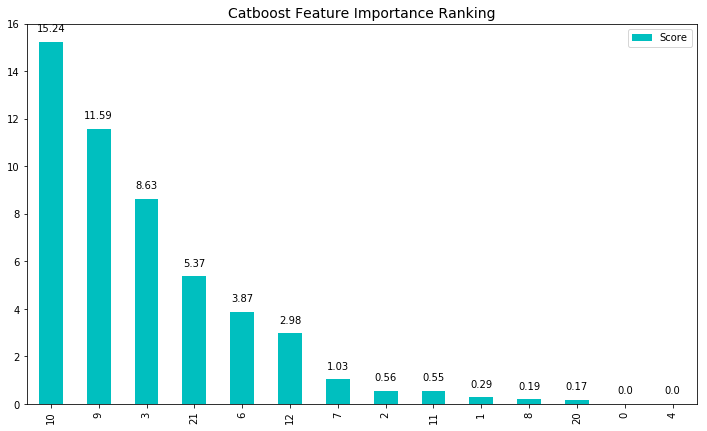

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [12]:
import sklearn.metrics as sklm

In [13]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[1,1] + '             %5d' % conf[1,0])
    print('Actual negative    %6d' % conf[0,1] + '             %5d' % conf[0,0])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = model.predict_proba(xtest)
print_metrics(ytest, probabilities, 0.5)   

                 Confusion matrix
                 Score positive    Score negative
Actual positive     25253             12155
Actual negative      7777             29815

Accuracy        0.73
AUC             0.81
Macro precision 0.74
Macro recall    0.73
 
           Positive      Negative
Num case    37408         37592
Precision    0.76          0.71
Recall       0.68          0.79
F1           0.72          0.75


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

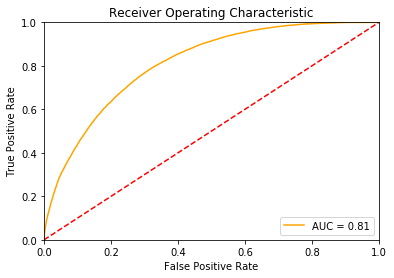

In [24]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(ytest, probabilities)   

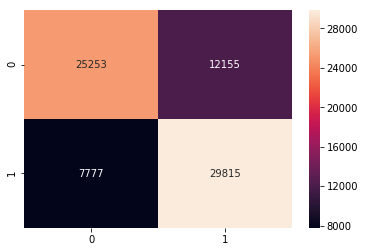

In [29]:
import seaborn as sns
from sklearn.metrics import f1_score,confusion_matrix
ypred =model.predict(xtest)
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,fmt="d")

In [18]:
print('the test accuracy is :{:.6f}'.format(accuracy_score(ytest, model.predict(xtest))))

the test accuracy is :0.734240


In [20]:
pred = model.predict(test)
pred = pred.astype(np.int)
submission = pd.DataFrame({'row_id':test['row_id'],'accepted':pred})

In [21]:
submission.to_csv('catboost.csv',index=False)